### 1. Do the following.

<p>(a) Return the 30x2 matrix where first column presents no. of hours of sunshine and second column presents no. of icecreams sold. Divide the data into training and testing sets.</p>



<p>(b) Plot the training data into a figure using the ”plot” command. Set the axes labels using the ”xlabel” and ”ylabel” commands.</p>



<p>(c) Apply Least Square Regression to predict the no. of icecreams sold given the no. of
hours of sunshine. Plot it using ”plot” command.</p>

In [2]:
# importing necessary libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# making dataset

data=pd.DataFrame({
    'no_of_hours_of_sunshine': [10.23, 10.2, 10.34, 9.30, 9.32, 10.41, 8.56, 10.43, 9.12, 9.35, 8.40, 9.12, 10.4, 10.50, 8.34, 8.23, 8.03, 10.20, 7.4, 8.3, 8.9, 10.4, 10.56, 11.03, 10.57, 8.4, 7.23, 8.34, 8.03, 9.45]
    ,'no_of_icecreams_sold' : [60, 58, 68, 45, 55, 47, 53, 54, 67, 55, 45, 47, 50, 67, 58, 45, 38, 39, 33, 49, 35, 47, 53, 52, 47, 40, 30, 52, 44, 45]
})
data

,no_of_hours_of_sunshine,no_of_icecreams_sold
0,10.23,60
1,10.20,58
2,10.34,68
3,9.30,45
4,9.32,55
5,10.41,47
6,8.56,53
7,10.43,54
8,9.12,67
9,9.35,55


In [4]:
# shape of dataset

data.shape

(30, 2)

In [5]:
X = data.drop('no_of_icecreams_sold', axis = 1)
Y = data['no_of_icecreams_sold']

In [6]:
# implimenting train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 32)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20, 1)
(10, 1)
(20,)
(10,)


In [11]:
type(X_test)

pandas.core.frame.DataFrame

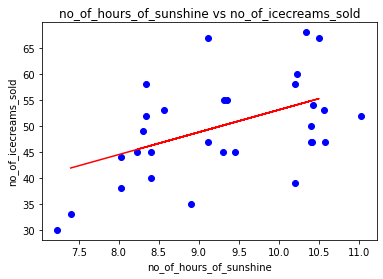

R^2=  -2.1169082859014026


In [7]:
# implementing Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lm = LinearRegression()
p=lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(data['no_of_hours_of_sunshine'], data['no_of_icecreams_sold'], color= 'blue')
plt.xlabel("no_of_hours_of_sunshine")
plt.ylabel("no_of_icecreams_sold")
plt.title("no_of_hours_of_sunshine vs no_of_icecreams_sold")
plt.plot(X_test['no_of_hours_of_sunshine'], Y_pred, color='red')  # red line is constructed by prediction on test data

plt.show()
print("R^2= ",r2_score(Y_pred,Y_test))

In [9]:
p.intercept_

10.082009864095511

In [8]:
p.coef_

array([4.30261063])

In [9]:
test_data=pd.DataFrame({
    'no_of_hours_of_sunshine': X_test['no_of_hours_of_sunshine'],
    'actual_no_of_icecreams_sold' : list(Y_test),
    'predicted_no_of_icecreams_sold' : list(Y_pred)
})

test_data.reset_index()

,index,no_of_hours_of_sunshine,actual_no_of_icecreams_sold,predicted_no_of_icecreams_sold
0,0,10.23,60,54.097717
1,13,10.50,67,55.259422
2,6,8.56,53,46.912357
3,12,10.40,50,54.829160
4,21,10.40,47,54.829160
5,15,8.23,45,45.492495
6,29,9.45,45,50.741680
7,25,8.40,40,46.223939
8,17,10.20,39,53.968638
9,18,7.40,33,41.921329
